# Task 04 - Tabu Search
## Introduction

Here I provide pseudocode for the Tabu Search (inspired by [Solid](https://github.com/100/Solid)):

### Tabu Search pseudo-python-code
``` python
# initial state is zeros of size n
def run_tabu_search(initial_state, tabu_size, max_steps):
    cur_steps = 0
    tabu_list = deque(maxlen=self.tabu_size)
    current = initial_state
    best = initial_state
    for i in index of iterations:

        neighborhood = _neighborhood()
        if not neighborhood: # empty list
            continue
        neighborhood_best = _best(neighborhood)

        while True:
            if allTrue([x in tabu_list for x in neighborhood]):
                # TERMINATING - NO SUITABLE NEIGHBORS
                return best, _score(best)
            if neighborhood_best in tabu_list:
                if _score(neighborhood_best) > _score(self.best):
                    tabu_list.append(neighborhood_best)
                    best = deepcopy(neighborhood_best)
                    break
                else:
                    neighborhood.remove(neighborhood_best)
                    neighborhood_best = _best(neighborhood)
            else:
                tabu_list.append(neighborhood_best)
                current = neighborhood_best
                if _score(current) > _score(best):
                    best = deepcopy(current)
                break
          
    iteration_best.append(_score(best))
    # TERMINATING - REACHED MAXIMUM STEPS
    return self.best, self._score(self.best)
```

### The implementation of neighbors and score:

``` python
def _score(state):
    if sum(problem.weights[state]) > self.p.M:
        return -1
    else:
        return int(sum(problem.prices[state]))

def _neighborhood(self):
    member = self.current
    neighborhood = []
    for i in range(len(member)):
        neighbor = member.copy()
        neighbor[i] = not member[i]
        neighborhood.append(list(neighbor))
    return neighborhood
```

**Notes:** Each instance is first sorted by price and I throw out items exceeding the overall capacity of backpack.

## Relative error of the Tabu Search

I chose 40 to 50 samples from the original `NK, ZKC, ZKW` datasets (from previous tasks) of size `n = {30, 32, 35, 37, 40}` and ran tabu search on these samples. Hyperparameters were: `tabu_size = 50 ; max_steps = 300`. Then I collected the relative error. 

In [21]:
# important imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilities import Solution, Problem, throw_out_large_items
from tabu_search import TabuSearchKnapsackSolver

### Relative error - average

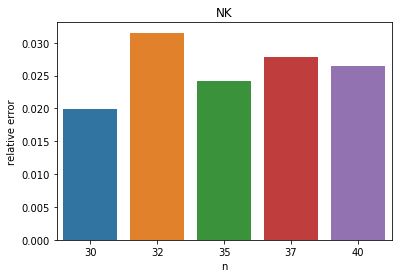

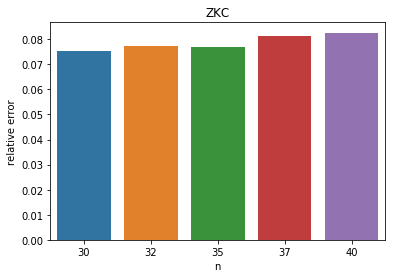

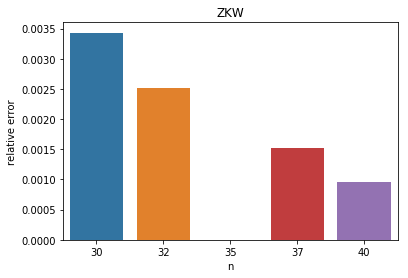

In [129]:
nums = [30, 32, 35, 37, 40]
for group in ["NK","ZKC","ZKW"]:
    means = list()
    for num in nums:
        df = pd.read_csv(f"data/results/{group}/{group}{num}_out.csv")
        means.append(np.mean(df.eps))
    fig, ax = plt.subplots(figsize=(6,4))
    sns.barplot(x=nums, y=means)
    ax.set(xlabel='n', ylabel='relative error', title=group)
    plt.show()

### Relative error - max
* Yes, this is the "true" one

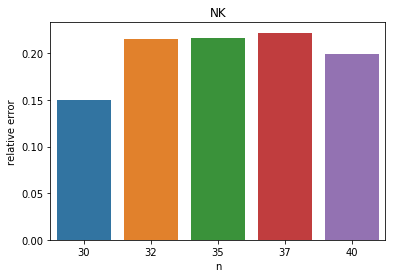

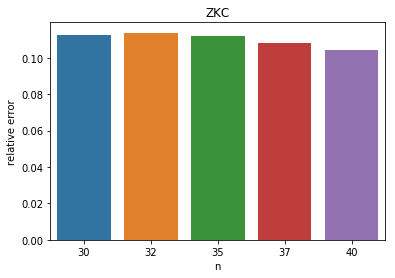

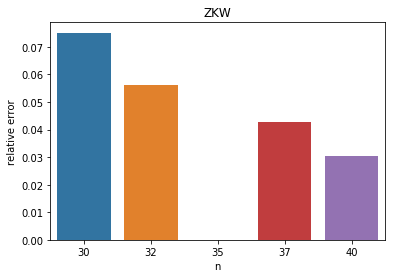

In [106]:
for group in ["NK","ZKC","ZKW"]:
    maxes = list()
    for num in nums:
        df = pd.read_csv(f"data/results/{group}/{group}{num}_out.csv")
        maxes.append(max(df.eps))
    fig, ax = plt.subplots(figsize=(6,4))
    sns.barplot(x=nums, y=maxes)
    ax.set(xlabel='n', ylabel='relative error', title=group)
    plt.show()

Don't be fooled by the missing bar in the last barplot, tabu search was doing very well on the last (`ZKW`) instance set, so the error is zero for $n=35$.

## Closer look at Tabu Search
I Chose a random instance from `NK` dataset, and plotted the behavior of my implementation of tabu search.

In [101]:
inst_line = "192 40 4351 153 917 127 1257 97 732 140 235 83 1301 41 2391 77 1543 127 594 130 1519 135 2293 193 2374 94 2156 110 1643 35 2258 240 1291 214 2447 33 2295 250 143 59 1349 1 2055 68 1196 43 1534 144 1524 72 386 40 686 181 2164 144 870 93 966 117 977 160 1172 170 2378 52 2224 103 2352 54 1889 147 1831 196 1417 45 102 67 1319 81 1994 64 644"
opt = 58316 # from solutions

inst = list(map(int, inst_line.split()))
p = throw_out_large_items(Problem(inst[0], inst[1], inst[2], np.array(inst[3::2]), np.array(inst[4::2])))

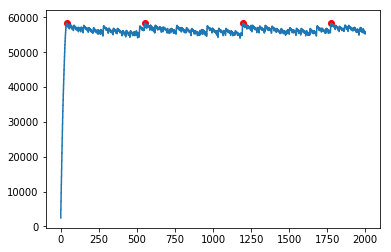

In [107]:
tabu_size = 500
max_steps = 2000
solver = TabuSearchKnapsackSolver(p, p.max_conf, tabu_size, max_steps)
best, score = solver.run(verbose=False)

x = np.arange(len(solver.iteration_best))
y = solver.iteration_best
plt.step(x, y, label='pre (default)')

iters = np.array(solver.iteration_best)
x = np.argwhere(iters == np.amax(iters)).flatten()
plt.scatter(x=x, y=iters[x], c='red')

x axis is number of iterations, y axis is price. Red dots are all the maximas found.

In [108]:
np.max(iters)

58316

Tabu search reached the global maximum in a few iterations.

Then I chose random instance from `ZKC` dataset and plotted the behavior

In [109]:
inst_line = "106 40 2989 242 2422 156 1653 92 1070 90 1060 158 1668 98 1125 236 2372 159 1681 94 1093 143 1531 45 653 67 845 110 1235 118 1310 192 1974 163 1714 222 2244 85 1010 28 501 33 547 138 1490 159 1674 190 1955 205 2095 145 1547 234 2349 3 271 22 443 160 1688 113 1260 134 1454 23 451 23 450 74 915 24 462 52 711 38 586 108 1221 141 1515 209 2130"
optimum = 34538

inst = list(map(int, inst_line.split()))
p = throw_out_large_items(Problem(inst[0], inst[1], inst[2], np.array(inst[3::2]), np.array(inst[4::2])))

In [110]:
tabu_size = 500
max_steps = 2000
solver = TabuSearchKnapsackSolver(p, p.max_conf, tabu_size, max_steps)
best, score = solver.run(verbose=False)

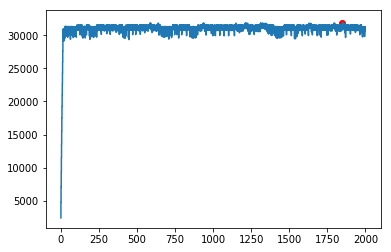

In [111]:
x = np.arange(len(solver.iteration_best))
y = solver.iteration_best
plt.step(x, y, label='pre (default)')

iters = np.array(solver.iteration_best)
x = np.argwhere(iters == np.amax(iters)).flatten()
plt.scatter(x=x, y=iters[x], c='red')

In [112]:
np.max(iters)

31822

Well, on this malicious instance, tabu search was stuck in a local maximas for a long time. It did not reach the global maximum, which is `34538`.

**Important note:** I tried to obtain the global maximum on the [visualizer by Vesely Jiri](https://veselj43.github.io/dp-advanced-iterative-methods/#/), but the maximum was something slightly above 33500. I tried to tweak the tabu search the best I could, but neither here I was able to obtain the global maximum (even with setting more parameters for the model and more iterations).

## Closer look at hyperparameters

In [62]:
tabu_sizes = list(range(10,100,10))
iterations = list(range(10,1000,100))
scores = list()
for tabu_size in tabu_sizes:
    l = list()
    for max_steps in iterations:
        solver = TabuSearchKnapsackSolver(p, p.max_conf, tabu_size, max_steps)
        best, score = solver.run(verbose=False)
        l.append(score)
    scores.append(l)
scores = pd.DataFrame(scores, index=tabu_sizes, columns=iterations)

[Text(51.0, 0.5, 'tabu_sizes'), Text(0.5, 42.0, 'iterations')]

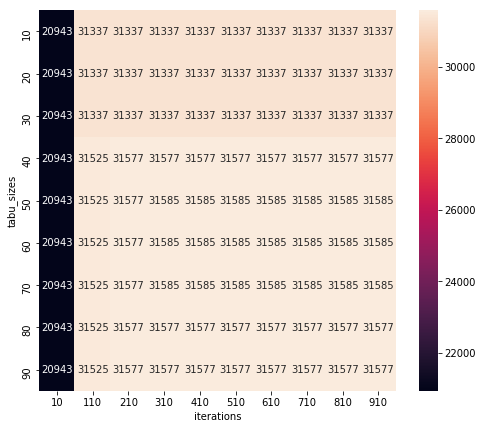

In [113]:
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(scores, annot=True, fmt="d")
ax.set(xlabel='iterations', ylabel='tabu_sizes')

Above is a heatmap of maximas reached with different hyperparameters set.

Obvious, that the solution depends on the number of iterations and not so much on tabu size (but still worth trying). 

## Time measurements

In [124]:
tabu_sizes = list(range(10,100,10))
iterations = list(range(10,1000,100))
times = list()
for tabu_size in tabu_sizes:
    l = list()
    for max_steps in iterations:
        solver = TabuSearchKnapsackSolver(p, p.max_conf, tabu_size, max_steps)
        t = %timeit -oq -r 3 -n 3 solver.run(verbose=False)
        l.append(np.mean(t.all_runs))
    times.append(l)
times = pd.DataFrame(times, index=tabu_sizes, columns=iterations)

[Text(51.0, 0.5, 'tabu_sizes'), Text(0.5, 42.0, 'iterations')]

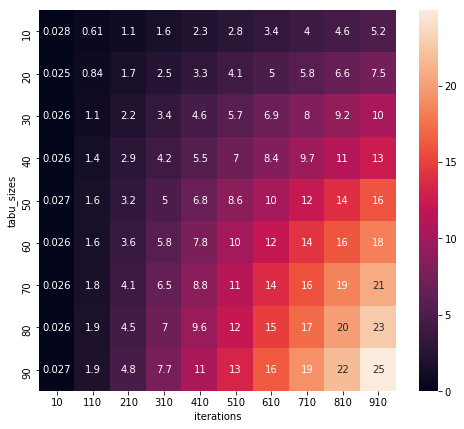

In [126]:
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(times, annot=True)
ax.set(xlabel='iterations', ylabel='tabu_sizes')

Above is a heatmap of time (in seconds) spent on malicious instance, when setting different hyperparameters.

Not very surprisingly, higher the number of iterations and the capacity of tabu list, higher the time complexity.

## Conclusion


*Stručný popis zvoleného algoritmu*

* I described the tabu search algorighm by providing edited pseudocode from [Solid](https://github.com/100/Solid) library. And my implementation of *neighbors* and *score* functions.


*Zkoušejte sledovat vývoj řešení (populace u GA) v průběhu běhu algoritmu. Graf potěší...*

* I provided the behavioral graph not only for random sample, but also for malicious input, where we can see the weaknesses of this algorithm.


*Experimentujte s různými nastaveními parametrů*

* I showed how increasing number of iterations and tabu list size helped to decrease relative error of the model

*Výsledek měření = čas výpočtu a rel. chyba. Pokud nejste schopni vypočítat rel. chybu, stačí uvést vývoj výsledné ceny (počáteční → koncová)*

* I provided time measurements and relative error measurements on a random sample from 3 datasets (of >=30 instance size). I also provided the graph of tendency of development on two instanes. 


*Pokuste se vyvodit nějaké závěry. Zhodnocení Vašich experimentů.*

* I see that I am missing some of the hyperparameters of this algorithm, which I may implment later in the 5th task. For now, I think this is enough.
* I was able to have the maximal relative error be around 0.2 for random input (~0.02 as average relative error) without tweaking the model. I just ran it with fixed number of iterations and tabu list size. I hope that these will be dynamically set in the next task.
* I still see some space for improvement of the complexity of the algorithm. I know, that optimalized neighbor function would bring me less time complexity. I will fix this in the next task.